In [1]:
# do imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string 
import nltk 
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
# Scrape Tweets

import snscrape.modules.twitter as sntwitter
import pandas as pd

# declare variables and query
tweets_list = []
tweet_count = 1000
query = "democrat since:2021-01-01 until:2022-11-13" 

# use TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i>tweet_count:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
# Creating a dataframe from the tweets list above
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df

,Datetime,Tweet Id,Text,Username
0,2022-11-12 23:59:59+00:00,1591581604115546113,"AZ 6, at this point, is no worse for democrats...",GalenMetzger1
1,2022-11-12 23:59:58+00:00,1591581601326305280,@blmartin2561 @WhitlockJason He’s actually rig...,rx_chapman
2,2022-11-12 23:59:58+00:00,1591581599325642752,@CatherineKimNY @bullfish777 @Nicolemarie_A Ev...,gmearley
3,2022-11-12 23:59:57+00:00,1591581596754546690,"@Chris_Meloni Seriously Chris, and I respect y...",Paul12515912
4,2022-11-12 23:59:57+00:00,1591581595961630723,@Reluctant_Us3r @elonismy @cjff13 @catturd2 Wh...,pat_hendy
...,...,...,...,...
996,2022-11-12 23:49:30+00:00,1591578968326606849,@Topher_mo @marcorubio This couldn't have incl...,jbgrandma1956
997,2022-11-12 23:49:30+00:00,1591578967760596992,@AntifaRioter @KittyKatStaxx00 @borrelli4sos T...,OzzieWestMI
998,2022-11-12 23:49:30+00:00,1591578966518890496,"From their point of view, Democrats are doing ...",stbythec
999,2022-11-12 23:49:29+00:00,1591578960970010624,@crypto Its democrat ponzi scheme thats no lon...,AppleStateWa


In [3]:
# clean tweets

def clean_string(a):
    
    # remove emoji's
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    a = emoji_pattern.sub(r'', a)

    # remove @ symbols and hashtags
    re_list = ['@[A-Za-z0–9_]+', '#']
    combined_re = re.compile( '|'.join( re_list) )
    a = re.sub(combined_re,'',a)

    # remove urls from text
    pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
    a = re.sub(pattern,'',a)
    output = a
    return output

length = len(tweets_df)

# clean tweets with function we wrote above
df = tweets_df
for i in range(length):
    df['Text'][i] = clean_string(df.iloc[i]['Text'])
    
for i in range(5):
    output = df.iloc[i]['Text']
    print(output)
    print('\n')


AZ 6, at this point, is no worse for democrats than a tossup.


2561  He’s actually right on the money.  But when you live on the Democrat plantation as you do, you just don’t understand. Well trained you are.


 777  Every voter who cast a ballot for a Democrat stopped the Red Wave.


 Seriously Chris, and I respect you as a good actor, one of the best, I’m surprised you get into the political game as an outspoken democrat. I don’t like you any less but I just can’t seem to get into a discussion without name calling on the part of dems.


3r  13 2 What would make them lean democrat. Mail in votes need to go. This is far from secure elections




In [4]:
# generate word cloud

from nltk.tokenize import WordPunctTokenizer
tk = WordPunctTokenizer()

def tokenize_and_process(d):
    
    d = str(d)
    lower_case = d.lower()
    words = tk.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

processed_tweets = []
level = int(length/10)
print ('Processsing and tokenizing tweets')
for i in range(length):
    if i % level == 0:
        print("Tweets {} of {} have been processed".format(i, length))
    processed_tweets.append(tokenize_and_process(df.Text[i]))
    
    
string = pd.Series(processed_tweets).str.cat(sep=' ')

Processsing and tokenizing tweets
Tweets 0 of 1001 have been processed
Tweets 100 of 1001 have been processed
Tweets 200 of 1001 have been processed
Tweets 300 of 1001 have been processed
Tweets 400 of 1001 have been processed
Tweets 500 of 1001 have been processed
Tweets 600 of 1001 have been processed
Tweets 700 of 1001 have been processed
Tweets 800 of 1001 have been processed
Tweets 900 of 1001 have been processed
Tweets 1000 of 1001 have been processed


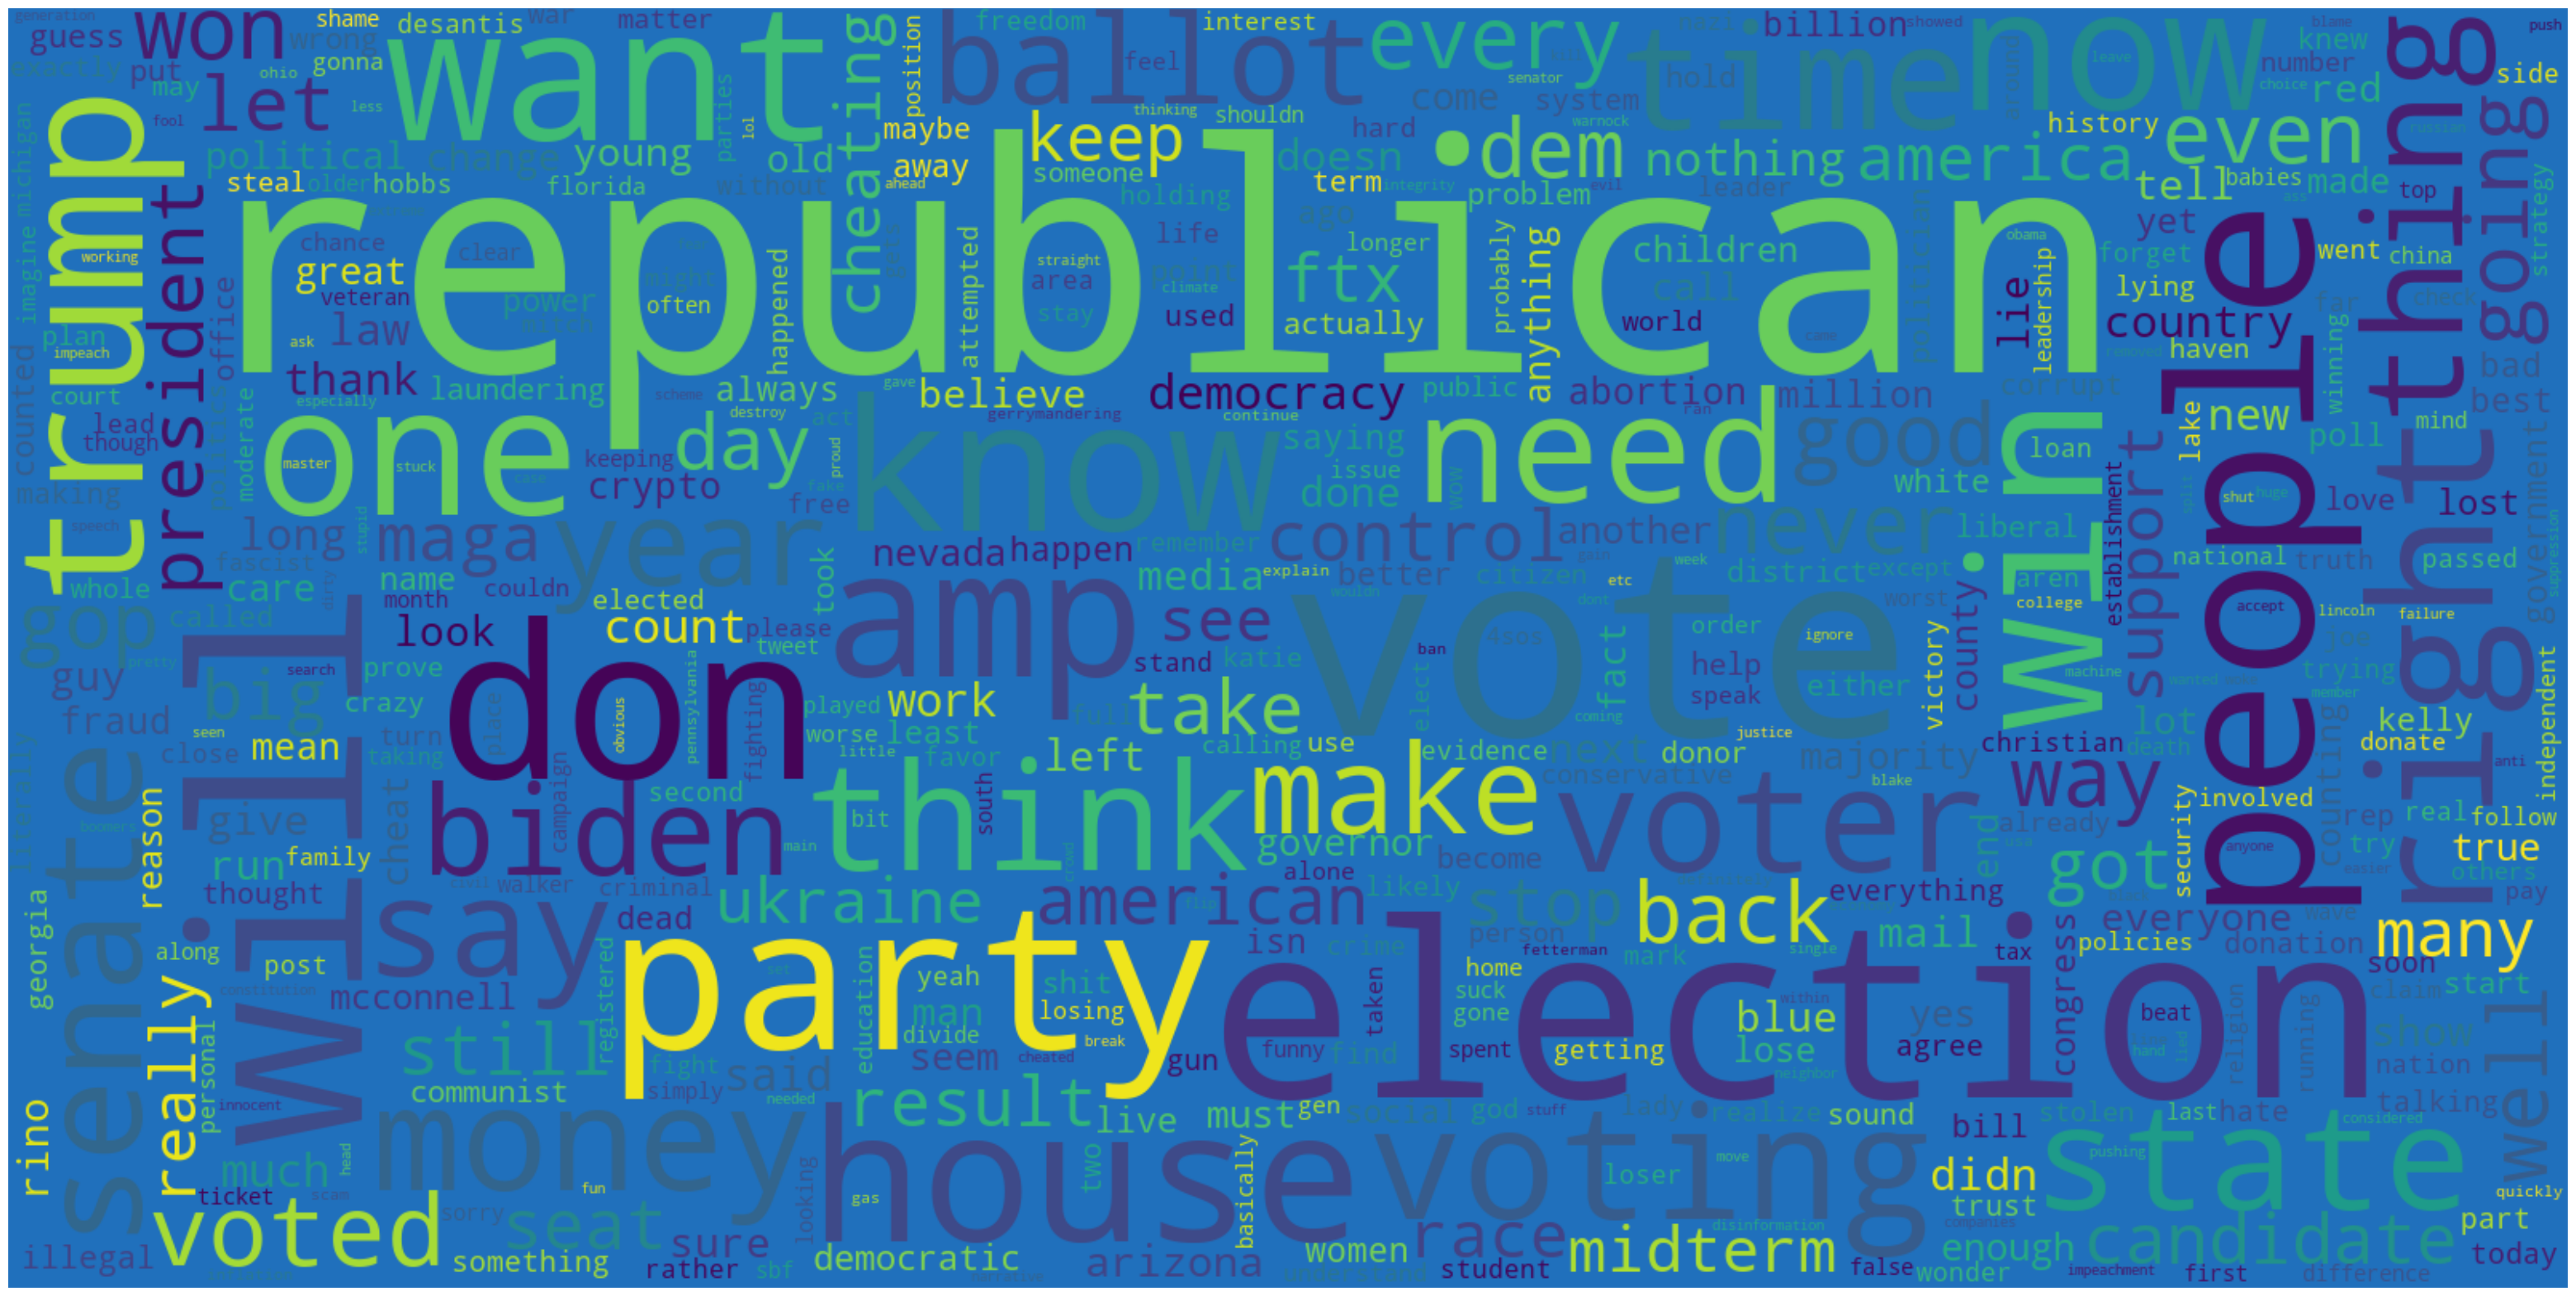

In [6]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
custom_stopwords = ['democrat','democrats']
stopwords.update(custom_stopwords)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=500,collocations=False, background_color='#2070bc').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### BERT Model

In [14]:
!pip install transformers requests beautifulsoup4 pandas numpy
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
import re

In [15]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


In [16]:
tokens = tokenizer.encode('I Love', return_tensors='pt')
result = model(tokens)
result.logits
int(torch.argmax(result.logits))+1


5

In [17]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [18]:
test = df.iloc[0]['Text']
test

'AZ 6, at this point, is no worse for democrats than a tossup.'

In [19]:
sentiment_score(test)

3

In [20]:
df['sentiment'] = df['Text'].apply(lambda x: sentiment_score(x[:512]))


Text(0, 0.5, 'Frequency')

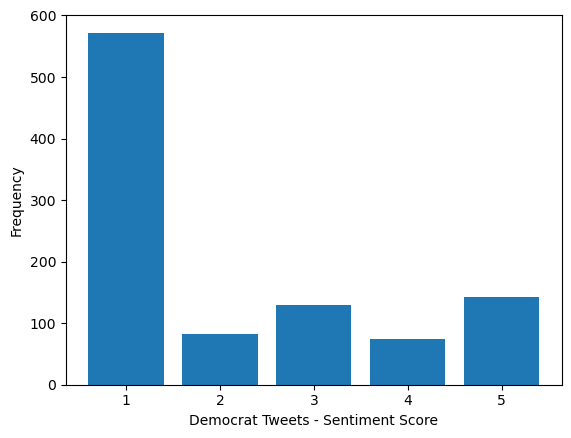

In [24]:
import matplotlib.pyplot as plt

a = df['sentiment'].value_counts()
y = [a[1],a[2],a[3],a[4],a[5]]
x = [1,2,3,4,5]
plt.bar(x,y)

plt.xlabel("Democrat Tweets - Sentiment Score")
plt.ylabel("Frequency")

In [27]:
demvalues = y
demvalues

[572, 82, 129, 75, 143]

In [28]:
repvalues = [547, 90, 134, 75, 155]
repvalues

[547, 90, 134, 75, 155]